In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [2]:
df = pd.read_csv('dataset/train_clean.csv')

In [3]:
X = df.drop(columns=['status','sl_no'], axis=1)
y = df['status']

In [4]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [5]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Random Forests


In [6]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9988888888888888


In [8]:
ytrain_pred

array([[0.02, 0.98],
       [0.07, 0.93],
       [0.07, 0.93],
       [0.97, 0.03],
       [0.04, 0.96],
       [0.03, 0.97],
       [0.04, 0.96],
       [0.01, 0.99],
       [0.11, 0.89],
       [0.05, 0.95],
       [0.  , 1.  ],
       [0.92, 0.08],
       [0.89, 0.11],
       [0.9 , 0.1 ],
       [0.98, 0.02],
       [0.85, 0.15],
       [0.  , 1.  ],
       [0.15, 0.85],
       [0.01, 0.99],
       [0.09, 0.91],
       [0.02, 0.98],
       [0.  , 1.  ],
       [0.03, 0.97],
       [0.06, 0.94],
       [0.93, 0.07],
       [0.  , 1.  ],
       [0.85, 0.15],
       [0.  , 1.  ],
       [0.93, 0.07],
       [0.05, 0.95],
       [0.1 , 0.9 ],
       [0.25, 0.75],
       [0.2 , 0.8 ],
       [0.06, 0.94],
       [0.08, 0.92],
       [0.04, 0.96],
       [0.01, 0.99],
       [0.05, 0.95],
       [0.07, 0.93],
       [0.8 , 0.2 ],
       [0.76, 0.24],
       [0.97, 0.03],
       [0.01, 0.99],
       [0.8 , 0.2 ],
       [0.05, 0.95],
       [0.01, 0.99],
       [0.98, 0.02],
       [0.99,

## Logistic Regression


In [9]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9173724437099773
Logistic test roc-auc: 0.8655555555555555


## Adaboost Classifier


In [10]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 1.0
Adaboost test roc-auc: 0.9922222222222222


## KNNClassifier


In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 1.0
Adaboost test roc-auc: 0.9888888888888889


## No we will focus on selecting the best threshold for maximum accuracy


In [12]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 1.0


In [13]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.78,0.901035,0.999991,1.0
1,0.90,0.979780,0.999991,1.0
2,0.22,0.195901,0.000009,0.0
3,0.87,0.953746,0.999995,1.0
4,0.16,0.235524,0.000009,0.0
...,...,...,...,...
60,0.99,0.953312,0.999995,1.0
61,0.96,0.950674,0.999995,1.0
62,0.90,0.473445,0.999991,1.0
63,0.97,0.937648,0.999995,1.0


In [14]:
final_prediction

0     0.920257
1     0.969943
2     0.103977
3     0.955935
4     0.098883
        ...   
60    0.985827
61    0.977667
62    0.843359
63    0.976911
64    0.222196
Length: 65, dtype: float64

In [15]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.99930265, 0.99930265, 0.40571064, 0.02762181])

In [16]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
2,0.405711,0.984615
3,0.027622,0.707692
0,1.999303,0.307692
1,0.999303,0.307692


In [17]:
accuracy_ls

,thresholds,accuracy
2,0.405711,0.984615
3,0.027622,0.707692
0,1.999303,0.307692
1,0.999303,0.307692


In [18]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

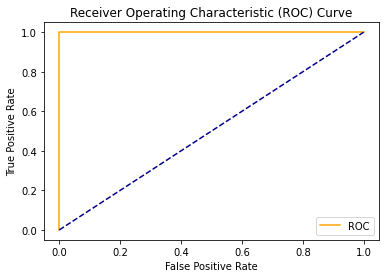

In [19]:
plot_roc_curve(fpr,tpr)

In [20]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])